In [138]:
import torch
import torch.utils.data
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [139]:
# Prepare data
my_data = np.genfromtxt('hospital_ready.csv', delimiter=',')[1:]
X = my_data[:,:-1]
Y = my_data[:, -1]
Y = Y-1
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train = X[:60000,:]
X_test = X[60000:,:]
Y_train = Y[:60000]
Y_test = Y[60000:]

In [155]:
# data loader
tensor_Xtr = torch.from_numpy(X_train).float()
tensor_Ytr = torch.from_numpy(Y_train).long()
tensor_Xva = torch.from_numpy(X_test).float()
tensor_Yva = torch.from_numpy(Y_test).long()

train = torch.utils.data.TensorDataset(tensor_Xtr, tensor_Ytr)
train_loader = torch.utils.data.DataLoader(train, batch_size=256, shuffle=True)

test = torch.utils.data.TensorDataset(tensor_Xva, tensor_Yva)
test_loader = torch.utils.data.DataLoader(test, batch_size=256, shuffle=True)


In [156]:
# define network
# define nnet
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(73, 200)
        self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(200, 200)
#         self.relu2 = nn.ReLU()
        self.out = nn.Linear(200, 3)
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
#         a2 = self.fc2(h1)
#         h2 = self.relu2(a2)
        a3 = self.out(h1)
        return a3
    
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(73, 200)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(200, 200)
        self.relu2 = nn.ReLU()
        self.out = nn.Linear(200, 3)
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        a2 = self.fc2(h1)
        h2 = self.relu2(a2)
        a3 = self.out(h2)
        return a3

In [169]:
# Create model
net = Net()
net.cuda()
opt = optim.SGD(net.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()  

In [158]:
# Test the Model
def test(net, loader):
    correct = 0
    total = 0
    for x, y in loader:
        x = Variable(x).cuda()
        outputs = net(x)
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted.cpu() == y).sum()
    return correct.item()/total

In [170]:
# run
best_ac = 0
train_ac = []
test_ac = []
train_loss = []
for epoch in range(20):
    for i, (x, y) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        x = Variable(x).cuda()
        y = Variable(y).cuda()
        
        # Forward + Backward + Optimize
        opt.zero_grad()  # zero the gradient buffer
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        opt.step()
        
    
    train_loss.append(loss.item())
    tr_ac = test(net, train_loader)
    te_ac = test(net, test_loader)
    train_ac.append(tr_ac)
    test_ac.append(te_ac)
    if te_ac > best_ac:
        torch.save(net.state_dict(), 'model.pb')
        best_ac = te_ac
    print("Epoch: %d, Loss: %4f, Train AC: %4f, Test AC: %.4f, Best AC: %.4f" %  (epoch, loss.item(), tr_ac, te_ac, best_ac))

Epoch: 0, Loss: 1.061552, Train AC: 0.528450, Test AC: 0.6617, Best AC: 0.6617
Epoch: 1, Loss: 1.062137, Train AC: 0.557800, Test AC: 0.6976, Best AC: 0.6976
Epoch: 2, Loss: 1.066353, Train AC: 0.569800, Test AC: 0.7169, Best AC: 0.7169
Epoch: 3, Loss: 1.038853, Train AC: 0.573933, Test AC: 0.7252, Best AC: 0.7252
Epoch: 4, Loss: 1.042144, Train AC: 0.575283, Test AC: 0.7279, Best AC: 0.7279
Epoch: 5, Loss: 1.017155, Train AC: 0.575567, Test AC: 0.7286, Best AC: 0.7286
Epoch: 6, Loss: 1.003508, Train AC: 0.576050, Test AC: 0.7289, Best AC: 0.7289
Epoch: 7, Loss: 1.007445, Train AC: 0.576250, Test AC: 0.7294, Best AC: 0.7294
Epoch: 8, Loss: 1.019916, Train AC: 0.576367, Test AC: 0.7295, Best AC: 0.7295
Epoch: 9, Loss: 0.997053, Train AC: 0.576367, Test AC: 0.7295, Best AC: 0.7295
Epoch: 10, Loss: 1.022908, Train AC: 0.576367, Test AC: 0.7296, Best AC: 0.7296
Epoch: 11, Loss: 0.967788, Train AC: 0.576367, Test AC: 0.7296, Best AC: 0.7296
Epoch: 12, Loss: 0.980334, Train AC: 0.576367, Tes

In [171]:
best_ac

0.7295537419690918

In [172]:
net = Net2()
net.cuda()
opt = optim.SGD(net.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss() 

In [173]:
# run 2
best_ac2 = 0
train_ac2 = []
test_ac2 = []
train_loss2 = []
for epoch in range(20):
    for i, (x, y) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        x = Variable(x).cuda()
        y = Variable(y).cuda()
        
        # Forward + Backward + Optimize
        opt.zero_grad()  # zero the gradient buffer
        outputs = net(x)
        loss = criterion(outputs, y)
        loss.backward()
        opt.step()
        
    
    train_loss2.append(loss.item())
    tr_ac = test(net, train_loader)
    te_ac = test(net, test_loader)
    train_ac2.append(tr_ac)
    test_ac2.append(te_ac)
    if te_ac > best_ac2:
        torch.save(net.state_dict(), 'model.pb')
        best_ac2 = te_ac
    print("Epoch: %d, Loss: %4f, Train AC: %4f, Test AC: %.4f, Best AC: %.4f" %  (epoch, loss.item(), tr_ac, te_ac, best_ac2))

Epoch: 0, Loss: 1.117867, Train AC: 0.095017, Test AC: 0.0634, Best AC: 0.0634
Epoch: 1, Loss: 1.113086, Train AC: 0.112783, Test AC: 0.0895, Best AC: 0.0895
Epoch: 2, Loss: 1.106054, Train AC: 0.181300, Test AC: 0.1940, Best AC: 0.1940
Epoch: 3, Loss: 1.103254, Train AC: 0.302450, Test AC: 0.3755, Best AC: 0.3755
Epoch: 4, Loss: 1.093999, Train AC: 0.439750, Test AC: 0.5614, Best AC: 0.5614
Epoch: 5, Loss: 1.089308, Train AC: 0.533183, Test AC: 0.6894, Best AC: 0.6894
Epoch: 6, Loss: 1.083782, Train AC: 0.568350, Test AC: 0.7223, Best AC: 0.7223
Epoch: 7, Loss: 1.078992, Train AC: 0.575600, Test AC: 0.7287, Best AC: 0.7287
Epoch: 8, Loss: 1.076333, Train AC: 0.576267, Test AC: 0.7296, Best AC: 0.7296
Epoch: 9, Loss: 1.066625, Train AC: 0.576367, Test AC: 0.7296, Best AC: 0.7296
Epoch: 10, Loss: 1.046983, Train AC: 0.576367, Test AC: 0.7296, Best AC: 0.7296
Epoch: 11, Loss: 1.057629, Train AC: 0.576367, Test AC: 0.7296, Best AC: 0.7296
Epoch: 12, Loss: 1.055568, Train AC: 0.576367, Tes

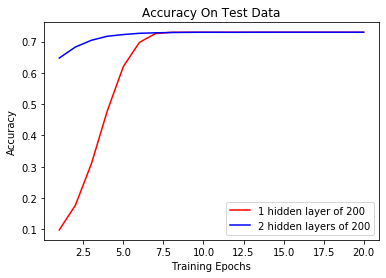

In [165]:
# plot accuracy
plt.plot(np.arange(20)+1, test_ac2, 'r')
plt.plot(np.arange(20)+1, test_ac, 'b')
plt.legend(['1 hidden layer of 200','2 hidden layers of 200'])
plt.title('Accuracy On Test Data')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('acc.jpg')

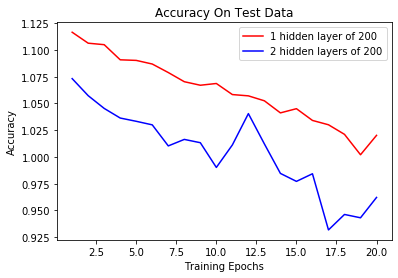

In [166]:
# plot loss
plt.plot(np.arange(20)+1, train_loss2, 'r')
plt.plot(np.arange(20)+1, train_loss, 'b')
plt.legend(['1 hidden layer of 200','2 hidden layers of 200'])
plt.title('Accuracy On Test Data')
plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.savefig('loss.jpg')

In [175]:
best_ac

0.7295537419690918

In [174]:
best_ac2

0.7295537419690918